In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Regression Example Random created Data


In [3]:
x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [4]:
x_data

array([0.5956072 , 0.11249442, 0.85993203, 4.04627527, 4.47072555,
       5.89550223, 7.69613427, 9.24792531, 8.74303946, 9.71110254])

In [8]:
y_label=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

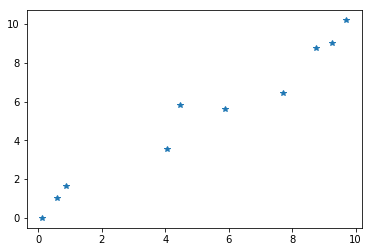

In [9]:
plt.plot(x_data,y_label,'*')

y=mx+b

In [11]:
np.random.rand(2)

array([0.95846982, 0.87546131])

In [12]:
m=tf.Variable(0.95)
b=tf.Variable(0.87)

In [14]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat=m*x+b
    
    error+=(y-y_hat)**2


In [15]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [16]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 1000
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

In [26]:
x_test=np.linspace(-1,11,10)
#y=mx+b
y_pred_plot = final_slope*x_test +final_intercept

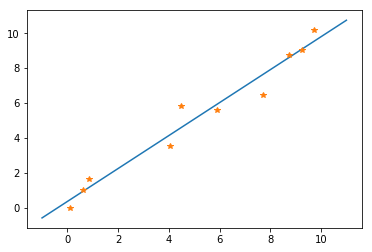

In [27]:
plt.plot(x_test,y_pred_plot)
plt.plot(x_data,y_label,'*')

In [29]:
x_data = np.linspace(0.0,10.0,1000000)

In [30]:
noise=np.random.randn(len(x_data))

y= mx+b

b=5


In [31]:
y_true=(0.5*x_data)+5+noise

In [34]:
x_df=pd.DataFrame(data=x_data,columns=['X_Data'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])
my_data=pd.concat([x_df,y_df],axis=1)

In [35]:
my_data.head()

,X_Data,Y
0,0.00000,6.218521
1,0.00001,5.099221
2,0.00002,4.563972
3,0.00003,5.030070
4,0.00004,3.894686


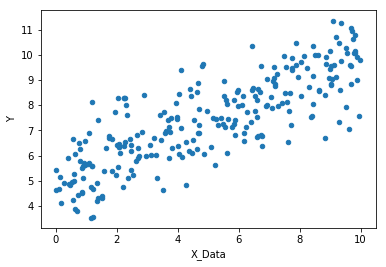

In [37]:
my_data.sample(n=250).plot(kind='scatter',x='X_Data',y='Y')

In [38]:
batch_size=8


In [39]:
m=tf.Variable(0.81)
b=tf.Variable(0.17)

In [40]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [42]:
y_model=m*xph+b


In [43]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [45]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [46]:
init = tf.global_variables_initializer()

In [47]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    
    model_m,model_b = sess.run([m,b])

In [48]:
model_m

0.5078217

In [49]:
model_b

4.8470206

In [50]:
y_hat=x_data*model_m +model_b

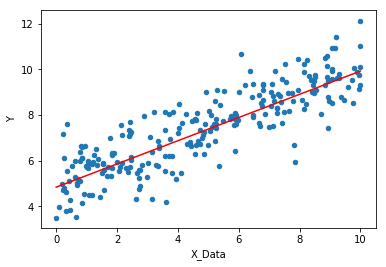

In [51]:
my_data.sample(250).plot(kind='scatter',x='X_Data',y='Y')
plt.plot(x_data,y_hat,'r')


## TF ESTIMATOR


In [52]:
 feat_cols=[ tf.feature_column.numeric_column('x',shape=[1]) ]

In [53]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\winuser\\AppData\\Local\\Temp\\tmp97txod4v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000000E907A20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [57]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [58]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)


In [59]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)


In [60]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\winuser\AppData\Local\Temp\tmp97txod4v\model.ckpt.
INFO:tensorflow:loss = 501.73694, step = 1
INFO:tensorflow:global_step/sec: 1075.27
INFO:tensorflow:loss = 32.447086, step = 101 (0.093 sec)
INFO:tensorflow:global_step/sec: 1265.82
INFO:tensorflow:loss = 51.38439, step = 201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1298.7
INFO:tensorflow:loss = 3.7731433, step = 301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1470.59
INFO:tensorflow:loss = 20.457794, step = 401 (0.068 sec)
INFO:tensorflow:global_step/sec: 1333.33
INFO:tensorflow:loss = 17.354763, step = 501 (0.075 sec)
INFO:tensorflow:global_step/sec: 1492.54
INFO:tensorflow:loss = 7.775841, step = 601 (0.067 sec)
INFO:tensorflow:global_step/s

In [61]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-22-11:17:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\winuser\AppData\Local\Temp\tmp97txod4v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-22-11:17:05
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1290734, global_step = 1000, label/mean = 7.5201163, loss = 9.032587, prediction/mean = 7.458884
INFO:tensorflow:Saving 'checkpoint_pat

In [62]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-22-11:17:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\winuser\AppData\Local\Temp\tmp97txod4v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-22-11:17:53
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.083066, global_step = 1000, label/mean = 7.472281, loss = 8.664528, prediction/mean = 7.4366345
INFO:tensorflow:Saving 'checkpoint_path

In [63]:
print('Trainin Data Metrics')
print(train_metrics)

Trainin Data Metrics
{'average_loss': 1.1290734, 'label/mean': 7.5201163, 'loss': 9.032587, 'prediction/mean': 7.458884, 'global_step': 1000}


In [64]:
print('Eval Metrics')
print(eval_metrics)

Eval Metrics
{'average_loss': 1.083066, 'label/mean': 7.472281, 'loss': 8.664528, 'prediction/mean': 7.4366345, 'global_step': 1000}


In [66]:
brand_new_data=np.linspace(0,10,10)
input_fn_predict=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [68]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\winuser\AppData\Local\Temp\tmp97txod4v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.377634], dtype=float32)},
 {'predictions': array([5.0620484], dtype=float32)},
 {'predictions': array([5.746463], dtype=float32)},
 {'predictions': array([6.430877], dtype=float32)},
 {'predictions': array([7.1152916], dtype=float32)},
 {'predictions': array([7.7997065], dtype=float32)},
 {'predictions': array([8.48412], dtype=float32)},
 {'predictions': array([9.168535], dtype=float32)},
 {'predictions': array([9.852949], dtype=float32)},
 {'predictions': array([10.537364], dtype=float32)}]

In [70]:
prediction = []
for pred in estimator.predict(input_fn=input_fn_predict):
    prediction.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\winuser\AppData\Local\Temp\tmp97txod4v\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [71]:
prediction

[array([4.377634], dtype=float32),
 array([5.0620484], dtype=float32),
 array([5.746463], dtype=float32),
 array([6.430877], dtype=float32),
 array([7.1152916], dtype=float32),
 array([7.7997065], dtype=float32),
 array([8.48412], dtype=float32),
 array([9.168535], dtype=float32),
 array([9.852949], dtype=float32),
 array([10.537364], dtype=float32)]

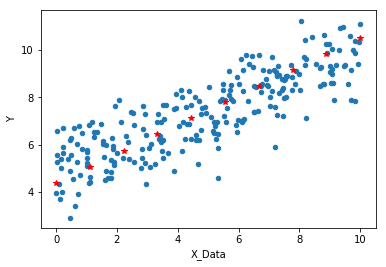

In [73]:

my_data.sample(250).plot(kind='scatter',x='X_Data',y='Y')
plt.plot(brand_new_data,prediction,'r*')